In [522]:
import pandas as pd      
import numpy as np       
import matplotlib.pyplot as plt 
%matplotlib inline  
import seaborn as sns    
import plotly.express as px      
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm     
from sklearn.metrics import mean_squared_error, r2_score   
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression


### ACCESS TO DATA AND CLEANING

In [523]:
desease_data_main = pd.read_csv('/Users/boryabaghir/Downloads/archive/train.csv', index_col=0)
desease_data_main

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


In [524]:
desease_data_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [525]:
desease_data_main.duplicated().sum()

0

# The data has 0 number of duplicates which in this case we are not dealing to handle duplicate data and cleaning

In [526]:
desease_data_main.isna().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

there is some missing values in data for example education, cigarettes per day, medication use, cholestrol level, glucose and more that needs handled

In [527]:
desease_data = desease_data_main.copy()

# Renaming the columns

In [528]:
desease_data.rename(columns={
    'cigsPerDay': 'cigs_per_day',
    'BPMeds': 'bp_meds',
    'prevalentStroke': 'prevalent_stroke',
    'prevalentHyp': 'prevalent_hyp',
    'totChol': 'total_cholesterol',
    'sysBP': 'systolic_bp',
    'diaBP': 'diastolic_bp',
    'BMI': 'bmi',
    'heartRate': 'heart_rate',
    'TenYearCHD': 'ten_year_chd'
}, inplace=True)

In [529]:
desease_data.describe(include='all')

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000



# Variables Description

## Demographic:

    Age: Age of the patient.

    Sex: male or female("M" or "F")

## Behavioral:

    is_smoking: whether or not the patient is a current smoker ("YES" or "NO").

    CigsPerDay: the number of cigarettes that the person smoked on average in one day.(countinous type feature because a person can smoke 'n' times a day)

## Medical(history):

    BPMeds: whether or not the patient was on blood pressure medication.

    Prevalent Stroke: whether or not the patient had previously had a stroke.

    Prevalent Hyp: whether or not the patient was hypertensive.

    Diabetes: whether or not the patient had diabetes.

## Medical(current):

    Tot Chol: total cholesterol level.

    Sys BP: systolic blood pressure.

    Dia BP: diastolic blood pressure.

    BMI: Body Mass Index.

    Heart Rate: heart rate.

    Glucose: glucose level.

## Target feature(class of risk):

    TenYearCHD: 10-year risk of coronary heart disease CHD (“1”, means “Yes”, “0” means “No”)



## Here we look for the data that has number of unique values to find out if it is categorical and continious data 

In [530]:
for avar in desease_data.columns.tolist():
      print("No. of unique values in ", avar , "is" , desease_data[avar].nunique(), ".")

No. of unique values in  age is 39 .
No. of unique values in  education is 4 .
No. of unique values in  sex is 2 .
No. of unique values in  is_smoking is 2 .
No. of unique values in  cigs_per_day is 32 .
No. of unique values in  bp_meds is 2 .
No. of unique values in  prevalent_stroke is 2 .
No. of unique values in  prevalent_hyp is 2 .
No. of unique values in  diabetes is 2 .
No. of unique values in  total_cholesterol is 240 .
No. of unique values in  systolic_bp is 226 .
No. of unique values in  diastolic_bp is 142 .
No. of unique values in  bmi is 1259 .
No. of unique values in  heart_rate is 68 .
No. of unique values in  glucose is 132 .
No. of unique values in  ten_year_chd is 2 .


### DATA Manipulation and Cleaning

In [531]:
desease_data['education'].fillna(desease_data['education'].mode()[0], inplace=True)

numerical_columns = [
    'cigs_per_day', 'bp_meds', 'total_cholesterol', 
    'bmi', 'heart_rate', 'glucose'
]

for i in numerical_columns:
    desease_data[i].fillna(desease_data[i].median(), inplace=True)

/var/folders/p4/scbl6gdx7834jxtztb0_p47w0000gn/T/ipykernel_12514/747818447.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/p4/scbl6gdx7834jxtztb0_p47w0000gn/T/ipykernel_12514/747818447.py:9: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

# In the data I used mode to handle missing values for categorical data and median for numerical values. Because the mode showing most frequently appearing values while median is the middle value.

"education" , "BPMeds" -> mode: As "education" and "BPMeds" is a categorical variable, the mode is the most appropriate measure of central tendency. The mode represents the most frequently occurring value in the distribution and can provide insight into the most common level of education in the dataset.

"glucose","totChol", "cigsPerDay", "BMI", "heartRate" -> median: Since this are numerical, continuous variable that contain extreme values or outliers, we have chosen the median as the appropriate measure of central tendency. The median is less sensitive to extreme values than the mean and provides a representative value for the central tendency of the distribution.


In [532]:
cleaned_data = desease_data.isnull().sum()
cleaned_data

age                  0
education            0
sex                  0
is_smoking           0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
bmi                  0
heart_rate           0
glucose              0
ten_year_chd         0
dtype: int64

# EDA ANALYSIS and Finding Patterns between features and dependant variable.

In [533]:
fig = px.box(desease_data, x='ten_year_chd', y='age', 
             color='sex',
             title="Age Distribution by sex and Ten-Year CHD Risk",
             labels={'ten_year_chd': 'Ten-Year CHD', 'age': 'Age'})
fig.show()


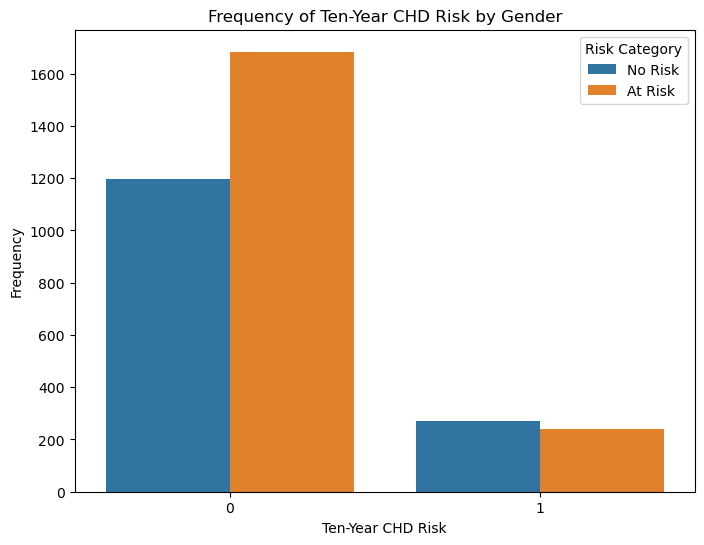

In [534]:
plt.figure(figsize=(8, 6))
sns.countplot(data=desease_data, x='ten_year_chd', hue='sex')
plt.title('Frequency of Ten-Year CHD Risk by Gender')
plt.xlabel('Ten-Year CHD Risk')
plt.ylabel('Frequency')

plt.legend(['No Risk', 'At Risk'], title='Risk Category')

plt.show()


In [535]:
smoking_chd_gender = desease_data.groupby(['sex', 'is_smoking', 'ten_year_chd']).size().reset_index(name='count')
smoking_chd_gender['proportion'] = smoking_chd_gender.groupby(['sex', 'is_smoking'])['count'].transform(lambda x: x / x.sum())
print(smoking_chd_gender)


  sex is_smoking  ten_year_chd  count  proportion
0   F         NO             0   1000    0.871840
1   F         NO             1    147    0.128160
2   F        YES             0    684    0.881443
3   F        YES             1     92    0.118557
4   M         NO             0    467    0.839928
5   M         NO             1     89    0.160072
6   M        YES             0    728    0.799122
7   M        YES             1    183    0.200878


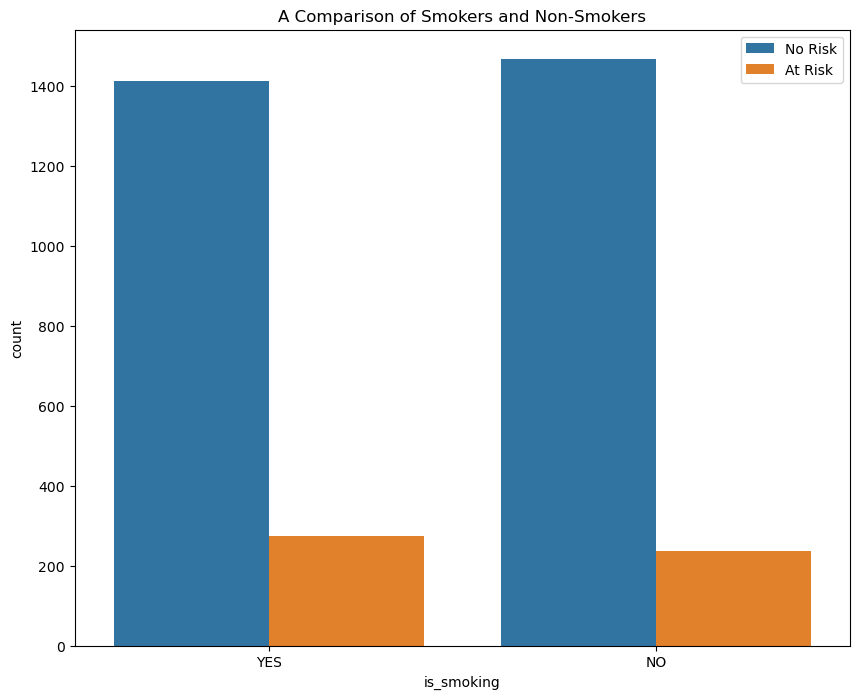

In [536]:
plt.figure(figsize=(10,8))
sns.countplot(data= desease_data, x='is_smoking', hue='ten_year_chd', )
plt.title('A Comparison of Smokers and Non-Smokers')
plt.legend(['No Risk', 'At Risk'])
plt.show()


### ENcoding data and handling skewness to make the normal distribution of data for relevant logistic regression model
### DATA TRANSFORMATION

In [537]:
encoded_data = desease_data.copy()
encoded_data['sex'] = encoded_data['sex'].map({'F': 0, 'M': 1})
encoded_data['is_smoking'] = encoded_data['is_smoking'].map({'NO': 0, 'YES': 1})

In [538]:
skewed_columns = encoded_data.skew().sort_values(ascending=False)
print(skewed_columns)

prevalent_stroke     12.297612
glucose               6.462108
diabetes              6.001977
bp_meds               5.563972
ten_year_chd          1.953182
cigs_per_day          1.232049
systolic_bp           1.175837
bmi                   1.025551
total_cholesterol     0.948170
prevalent_hyp         0.795189
education             0.735240
diastolic_bp          0.718173
heart_rate            0.676660
sex                   0.271614
age                   0.225796
is_smoking            0.009444
dtype: float64


In [539]:
encoded_data['log_glucose'] = np.log1p(encoded_data['glucose'])
encoded_data['log_systolic_bp'] = np.log1p(encoded_data['systolic_bp'])
encoded_data['log_bmi'] = np.log1p(encoded_data['bmi'])
encoded_data['log_cigs_per_day'] = np.log1p(encoded_data['cigs_per_day'])

Variables like glucose, systolic_bp, and cigs_per_day often have long tails (i.e., a few very high values).Reducing their influence and making the variable more normally distributed.
log1p is used instead of log because it can handle zeros by computing log(1 + x) (avoiding undefined results for log(0)).

In [540]:
encoded_data['sqrt_total_cholesterol'] = np.sqrt(encoded_data['total_cholesterol'])
encoded_data['sqrt_diastolic_bp'] = np.sqrt(encoded_data['diastolic_bp'])


For variables with moderate skewness (e.g., total_cholesterol and diastolic_bp), square root transformation compresses larger values but not as aggressively as log. Features like total_cholesterol and diastolic_bp may have less extreme skewness compared to variables like glucose.

### THE VISUAL REPRESENTATION OF SKEWNESS before / after

In [541]:
variables_before = ['glucose', 'systolic_bp', 'bmi', 'cigs_per_day', 'total_cholesterol', 'diastolic_bp']
variables_after = ['log_glucose', 'log_systolic_bp', 'log_bmi', 'log_cigs_per_day', 'sqrt_total_cholesterol', 'sqrt_diastolic_bp']

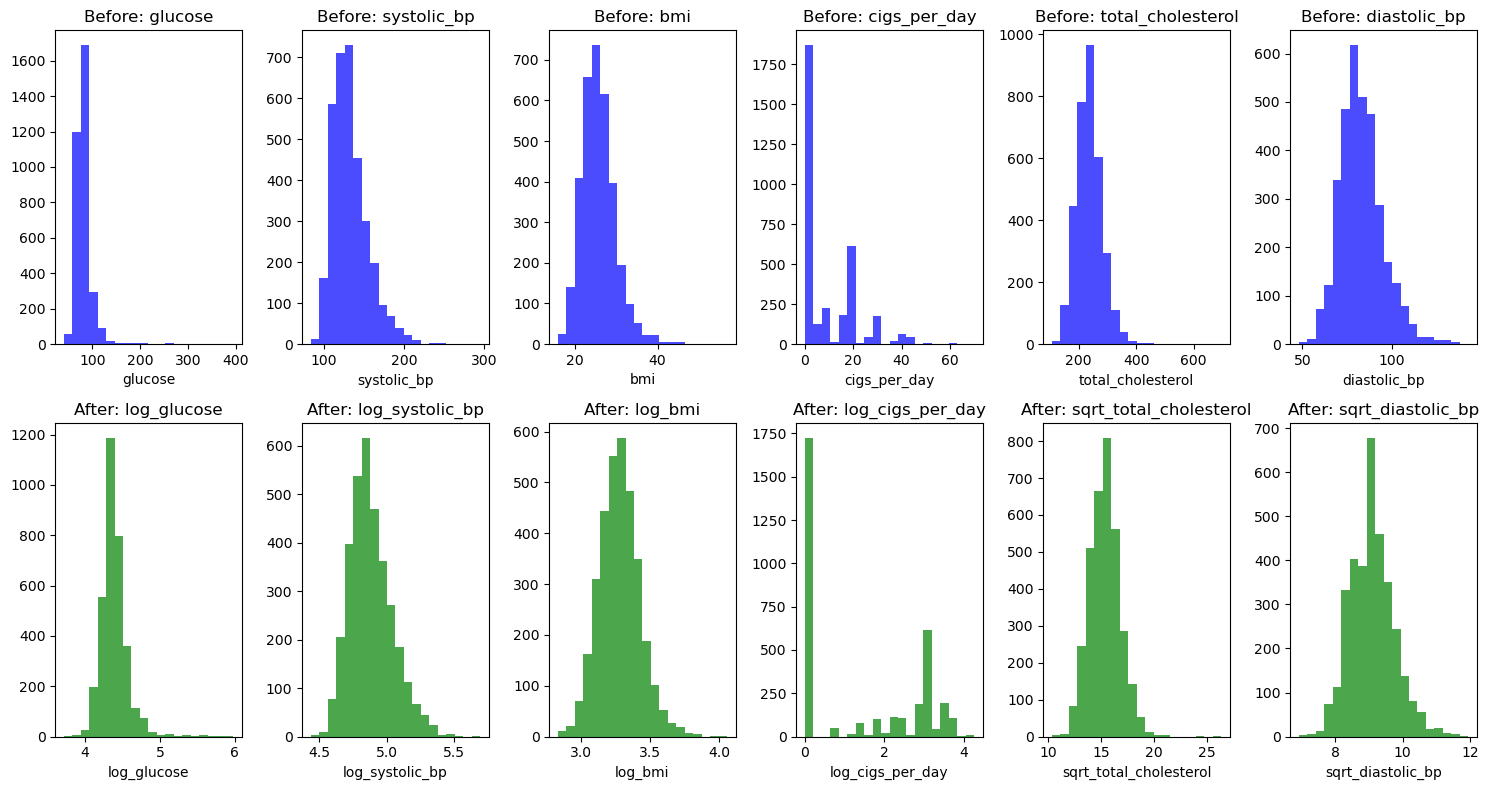

In [542]:
n_vars = len(variables_before)
fig, axes = plt.subplots(nrows=2, ncols=n_vars, figsize=(15, 8))

for i, var in enumerate(variables_before):
    # Before transformation
    axes[0, i].hist(encoded_data[var], bins=20, alpha=0.7, color='blue')
    axes[0, i].set_title(f"Before: {var}")
    axes[0, i].set_xlabel(var)
    
    # After transformation
    axes[1, i].hist(encoded_data[variables_after[i]], bins=20, alpha=0.7, color='green')
    axes[1, i].set_title(f"After: {variables_after[i]}")
    axes[1, i].set_xlabel(variables_after[i])

# Adjust layout
plt.tight_layout()
plt.show()

### CORELLATION OF THE ORIGINAL DATA with encoded values.

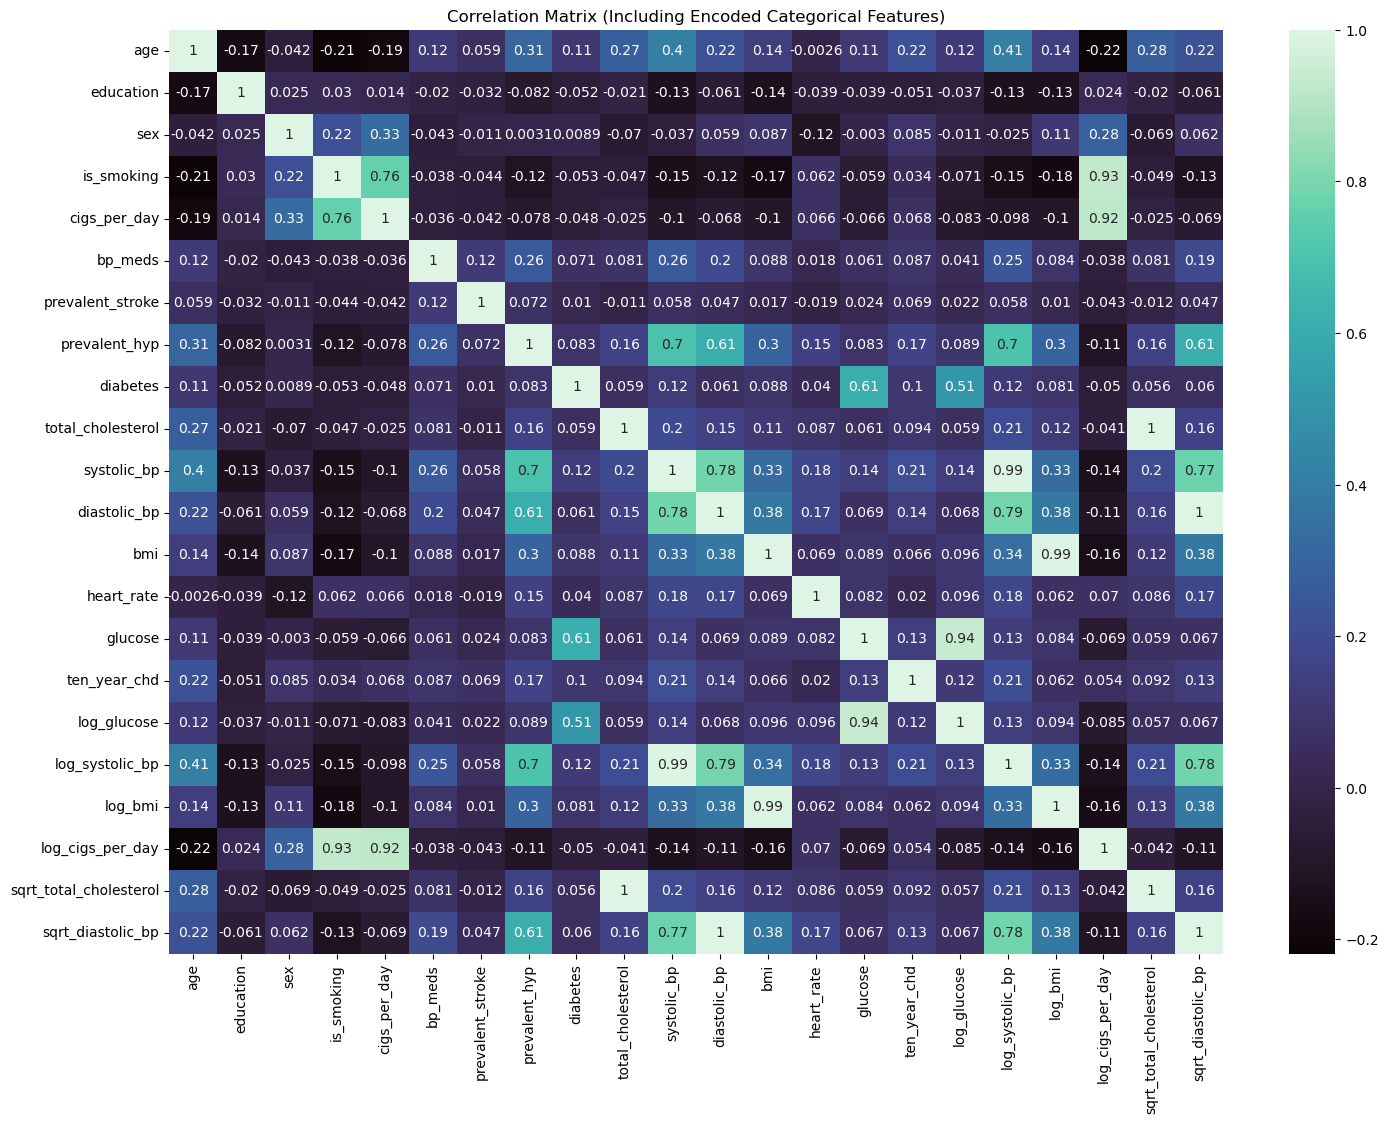

In [543]:
reg_data = encoded_data.select_dtypes(include=['number'])
correlation_encoded = reg_data.corr()

plt.figure(figsize=(17, 12))
sns.heatmap(correlation_encoded, annot=True, cmap=sns.color_palette("mako", as_cmap=True))
plt.title("Correlation Matrix (Including Encoded Categorical Features)")
plt.show()

In [544]:
columns_to_include = [col for col in encoded_data.columns if col.startswith('log_') or col.startswith('sqrt_')] + [
    'age', 'sex','education', 'is_smoking','bp_meds', 'prevalent_hyp', 'diabetes', 'ten_year_chd'
]
data_cleaned = encoded_data[columns_to_include]

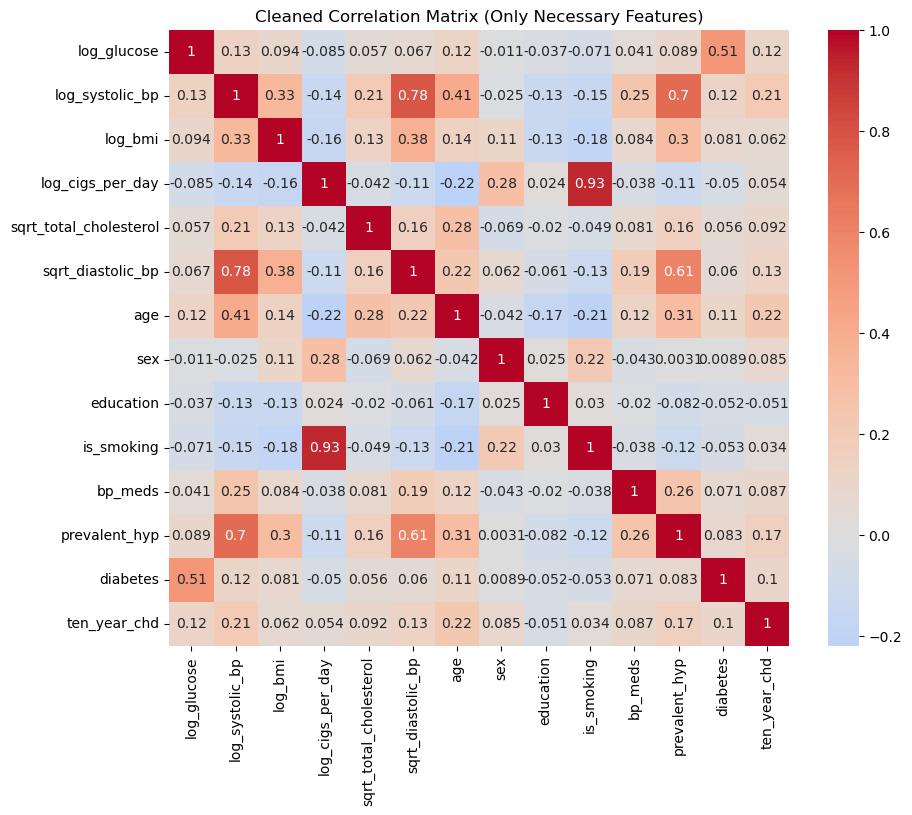

In [545]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Cleaned Correlation Matrix (Only Necessary Features)")
plt.show()

## Correllation with Target Variable (ten_year_chd)

    age: Moderately correlated (0.22)—older individuals are more likely to have CHD risk.
    log_systolic_bp: Moderate positive correlation (0.21)—higher systolic blood pressure increases CHD risk.
    prevalent_hyp: Some positive correlation (0.17)—having hypertension increases the likelihood of CHD.
    diabetes: Weak correlation (0.13), but still relevant as diabetes contributes to CHD risk.
    Other features: Variables like log_bmi, is_smoking, and education have very weak or no correlations with ten_year_chd.

In [546]:
data_cleaned.columns

Index(['log_glucose', 'log_systolic_bp', 'log_bmi', 'log_cigs_per_day',
       'sqrt_total_cholesterol', 'sqrt_diastolic_bp', 'age', 'sex',
       'education', 'is_smoking', 'bp_meds', 'prevalent_hyp', 'diabetes',
       'ten_year_chd'],
      dtype='object')

In [547]:
#X = data_cleaned[['age', 'sex','prevalent_hyp', 'diabetes', 'log_cigs_per_day', 'log_systolic_bp', 'sqrt_diastolic_bp', 'log_glucose']] 
#y = data_cleaned['ten_year_chd']

X = data_cleaned[['age', 'sex','prevalent_hyp', 'diabetes', 'log_cigs_per_day', 'is_smoking', 'log_systolic_bp', 'sqrt_diastolic_bp', 'log_glucose', 'sqrt_total_cholesterol','bp_meds' ]] 
y = data_cleaned['ten_year_chd']

In [548]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


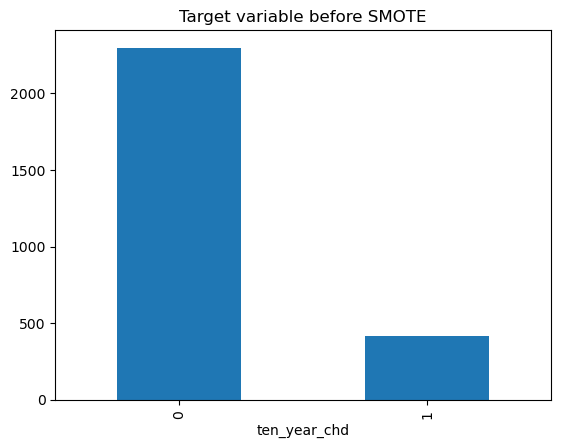

In [549]:
y_train.value_counts().plot(kind='bar', title='Target variable before SMOTE')
plt.show()

# this shows how the train data sampled in between in risk or no risk classifications. The random sampling is not applicable in this case and needs equally distributed.

In [550]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

print("Intercept:", log_reg.intercept_)
print("Coefficients:", log_reg.coef_)


Intercept: [-1.97340113]
Coefficients: [[ 0.5676258   0.27276554  0.06519235  0.01389286  0.43101787 -0.17346102
   0.33200966 -0.06070349  0.19434248  0.06405864  0.05166576]]


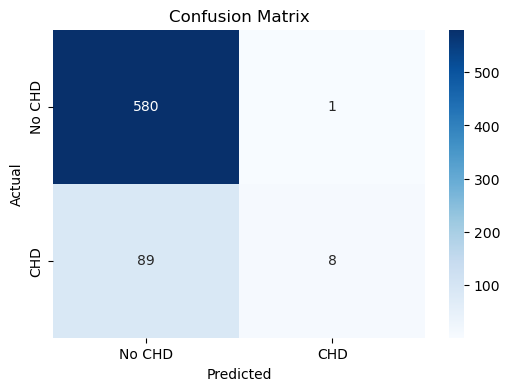

In [551]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [552]:
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.87
ROC-AUC Score: 0.74

Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       581
           1       0.89      0.08      0.15        97

    accuracy                           0.87       678
   macro avg       0.88      0.54      0.54       678
weighted avg       0.87      0.87      0.82       678



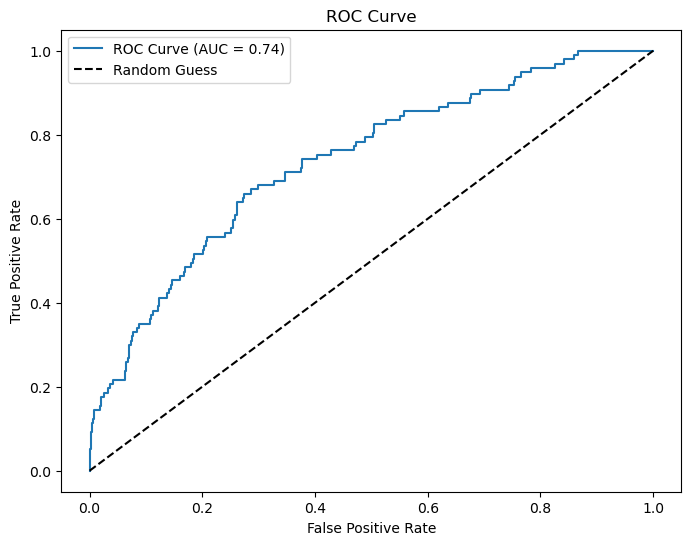

In [553]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


/var/folders/p4/scbl6gdx7834jxtztb0_p47w0000gn/T/ipykernel_12514/2136652401.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




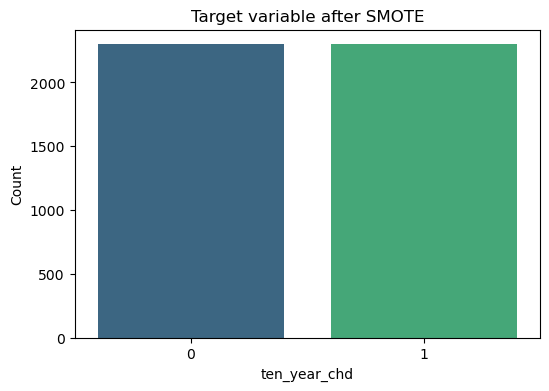

In [554]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled, palette='viridis')
plt.title("Target variable after SMOTE")
plt.xlabel("ten_year_chd")
plt.ylabel("Count")
plt.show()

#

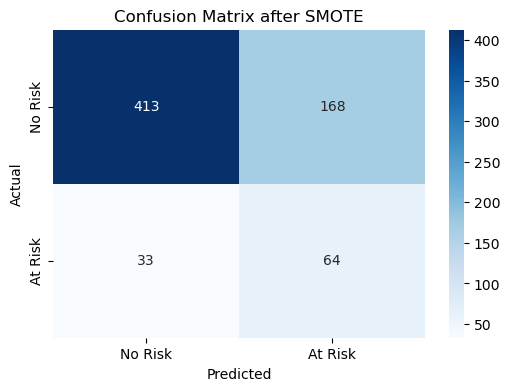

Accuracy: 0.70
ROC-AUC Score: 0.74

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.71      0.80       581
           1       0.28      0.66      0.39        97

    accuracy                           0.70       678
   macro avg       0.60      0.69      0.60       678
weighted avg       0.83      0.70      0.74       678



In [555]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_resampled, y_resampled)

predicted_probabilities = logistic_model.predict_proba(X_test_scaled)[:, 1]
predicted_classes = (predicted_probabilities >=0.5).astype(int)

accuracy = (predicted_classes == y_test).mean()
roc_auc = roc_auc_score(y_test, predicted_probabilities)
classification_report_output = classification_report(y_test, predicted_classes)

conf_matrix = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Risk', 'At Risk'], yticklabels=['No Risk', 'At Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after SMOTE')
plt.show()

# Display metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("\nClassification Report:\n", classification_report_output)


True Positive (TP): 

    The model correctly predicted "At Risk" for 64 cases.

True Negative (TN):

    The model correctly predicted "No Risk" for 413 cases.

False Positive (FP):

    The model incorrectly predicted "At Risk" for 168 cases that are actually "No Risk."

False Negative (FN):

    The model incorrectly predicted "No Risk" for 33 cases that are actually "At Risk."

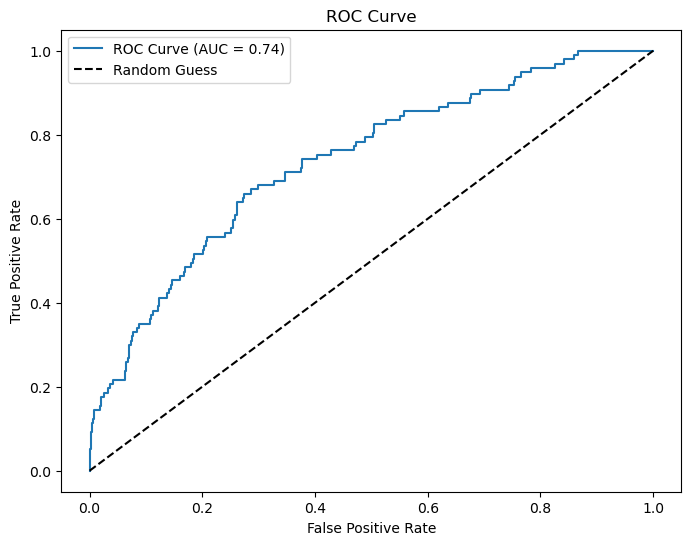

In [556]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# CONCLUSION

In conclusion, I have created 2 modules to identify the best fits of the data. As the requirement is to find out CHD in 10 years period our recall is more important than overall accuracy. In the first model where i used original smoked data was having more values.

Results Analysis

    Accuracy: 70%
        A slight drop in overall accuracy compared to the previous 87%, but this is acceptable when improving recall for the minority class (CHD = 1).

    ROC-AUC: 0.74
        The ROC-AUC is consistent with previous results, indicating a steady ability to distinguish between classes.

    Performance for CHD = 1:
        Recall (66%): The model identifies 66% of actual CHD = 1 cases, which is key in healthcare scenarios.
        Precision (28%): Precision remains low due to false positives, which is expected when recall is prioritized.

    Weighted Avg F1-Score: 0.74
        The overall F1-score shows the model is still fairly balanced across both classes.